# **2. Ранкиново полутело**

Разматра се опструјавање извора који се налази у координатном почетку, униформном струјом интензитета $U_{\infty}$. Комплексни потенцијал којим је описано ово струјање је 

$$w(z) = U_{\infty}\, z + \frac{\varepsilon}{2\pi}\,\ln z$$

Визуелизацију овог струјања ћемо извршити користећи функције из нумпај (numpy) и матплотлиб (matplotlib) модула. У ту сврху, прво ћемо учитати те модуле, и дефинисати да позадина дијаграма буде светло сива. Избор боје позадине није неопходна ставка у програму. Такође, како ће користити вредност $\pi$ у каснијем делу програма, његову вредност ћемо преузети из модула нумпај (numpy).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = '#EBECF0' # светло сива позадина дијаграма
pi = np.pi
print (pi)

3.141592653589793


Функција print штампа вредност промењиве на стандарндом излазу (терминал, или пак ова Јупитер страница). Даље је неопходно дефинисати домен у коме желимо да прикажемо струјну слику, тачније његове границе по координатама $x, y$:

$$ -5 \leqslant x \leqslant 10, \qquad -5 \leqslant y \leqslant 5$$

јер се ради о раванском струјању - домен ће бити облика правоуганика (део равни $x,y$). Избор ових граница је потпуно произвољан - он се бира тако да добијена крајња слика за задате параметру ($U_{\infty}$ и $\varepsilon$) буде адекватно приказана. Изабране опсеге ћемо поделити на одговарајући број тачака. У ту сврху можемо користити неколико функција у оквиру нумпај модула. Овде ћемо изабрати функцију linspace, која формира низ од $N_x$ задатог броја елемената (чланова) са $x_{\min}$ као првим елементом, а $x_{\max}$ као последњим елементом. Низ је растући, и сваки његов следећи елемент је већи од претходног за $\Delta x$, где је $\Delta x = (x_{\max} - x_{\min})/(N_x-1)$

In [2]:
Nx = 401
Ny = 201
x = np.linspace(-5, 10, Nx)
y = np.linspace(-5, 5, Ny)
print("Дужина низа x (број елемената):", len(x), "   ||   Индекс првог члан низа је 0, а последњег", Nx-1, ".")
print("Први елемент низа x[0] = ", x[0],  ", a последњи x[", Nx-1,"] = ", x[Nx-1])

Дужина низа x (број елемената): 401    ||   Индекс првог члан низа је 0, а последњег 400 .
Први елемент низа x[0] =  -5.0 , a последњи x[ 400 ] =  10.0


Сада ћемо направити нумеричку мрежу, односно парове тачака са координатама $(x, y)$, тако да се сваки елемент низа $x$ комбинује са сваким елементом низа $y$. У ту сврху користимо команду meshgrid из модула numpy, која прави тзв. **енторку** (енг. tuples)

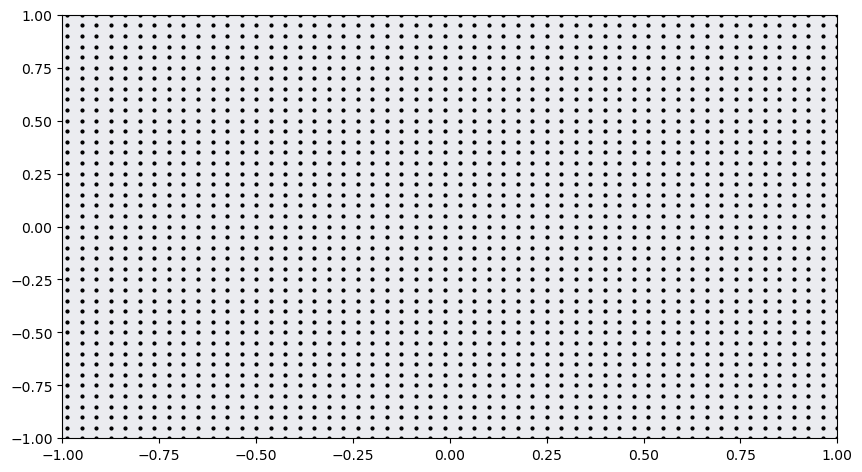

In [3]:
X,Y = np.meshgrid(x,y)
plt.figure(figsize=(10, 5.5), dpi=100)
plt.plot(X, Y, marker='o', ms=2, color='k', alpha=1, linestyle='none')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [4]:
# Вредности за интензитет униформне струје 
# и издашност извора
Uinf = 1
Eps = 8

z = X + 1j*Y
# Kompleksni potencijal
w = Uinf*z + Eps/(2*pi)*np.log(z)
phi = w.real
psi = w.imag

Са овим командама су дефинисанe фукнције $\varphi(x,y)$ и $\psi(x,y)$, тачније њихове вредности у свима тачкама нумеричке мреже (познате вредности $x$ и $y$). Сада ћемо користити функцију која ће спојити линије са истим вредностима одговарајаће функције. Пре тога, морамо дефинисати које су то вредности. Изабраћемо да су то контуре на којима је вредност струјне функције од $-2\varepsilon$ до $2\varepsilon$, и израбраћено да тај број контура буде 65, са претходно дефинисаном функцијом np.linspace.

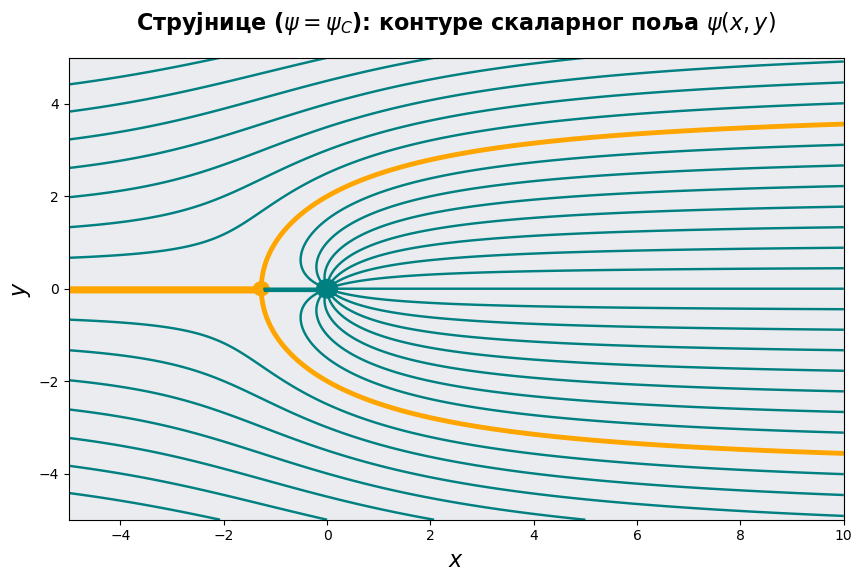

In [12]:
psiC = np.linspace(-2*Eps, 2*Eps, 65)

plt.figure(figsize=(10, 6), dpi=100)
plt.title("Струјнице ($\psi = \psi_C$): контуре скаларног поља $\psi(x,y)$", fontsize=16, pad = 20, weight='bold')
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
strujnice = plt.contour(X,Y, psi, levels = psiC, colors='teal', linewidths=1.75, linestyles='solid')

## На карактеристичној струјници вредност струјне функције је Eps/2, односно -Eps/2
rankine = plt.contour(X,Y, psi, levels=[-Eps/2, Eps/2], colors='orange', linewidths=3.5, linestyles='solid')

## Eстетике ради, додајемо тачке које означавају извор и положај зауставне тачке
circle = plt.Circle((0.0, 0.0), radius=0.2, color='teal')
plt.gca().add_patch(circle)
circle = plt.Circle((-Eps/(2*pi*Uinf), 0.0), radius=0.15, color='orange')
plt.gca().add_patch(circle)

На овим контурама нема стрелица које означавају смерове струјања, односно смер вектора брзине у датим тачкама, јер су оне еквискаларне линије скаларног поља - струјне функције. За приказивање смерова струјања, треба графички приказати векторске линије векторског поља брзине. Комплексна брзина $\overline{U}(z)$ је комплексна аналитичка функција која се дефинише као извод комплексног потенцијала $w(z)$, што се у овом случају своди на 

$$ \overline{U}(z) \equiv u(x,y) - i v(x,y)= \frac{\mathrm{d}w(z)}{\mathrm{d}z} = \frac{\mathrm{d}}{\mathrm{d}z} \left( U_{\infty} z + \frac{\varepsilon}{2\pi}\, \ln z\right) = U_{\infty}  + \frac{\varepsilon}{2 \pi z}$$

Реални део комплексне функције $\overline{U}(z)$ је скаларно поље брзине $u(x,y)$, док је имагинарни део $-v(x,y)$, то јест

$$ u = \mathrm{Re}\left[\overline{U}(z)\right], \qquad v = - \mathrm{Im}\left[\overline{U}(z)\right]$$

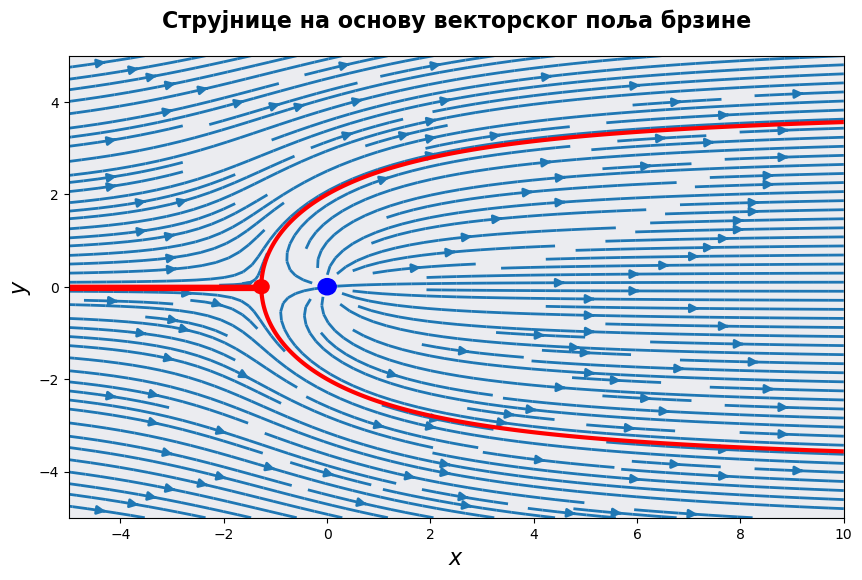

In [10]:
U = Uinf + Eps/(2*pi*z)
u = U.real
v = -U.imag

plt.figure(figsize=(10,6), dpi=100)
plt.title("Струјнице на основу векторског поља брзине", fontsize=16, pad = 20, weight='bold')
plt.streamplot(X, Y, u, v, density=[1.75], linewidth=2, arrowsize = 1.25)
plt.contour(X,Y, psi, levels=[-Eps/2, Eps/2], colors='red', linewidths=3, linestyles='solid')
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16)

# Извор у координатном почетку
circle = plt.Circle((0.0, 0.0), radius=0.175, color='blue', zorder=2)
plt.gca().add_patch(circle)

# Зауставна тачка
circle = plt.Circle((-Eps/(2*pi*Uinf), 0.0), radius=0.15, color='red')
plt.gca().add_patch(circle)

Даље се, на пример, може одредити и поље притиска, и приказати његова расподела. Поље притиска је са пољем брзине повезано преко Бернулијеве једначине 

$$ p + \rho \frac{U^2}{2} = \mathrm{const} \qquad \Rightarrow \qquad p + \rho \frac{U^2}{2} = p_{\infty} + \rho \frac{U_{\infty}^2}{2} \qquad \Rightarrow \qquad p - p_{\infty} = \rho\frac{U_{\infty}^2}{2} \left( 1 - \frac{U^2}{U_{\infty}^2}\right) \qquad \Rightarrow \qquad C_p \equiv \frac{p-p_{\infty}}{\frac{1}{2}\rho U_{\infty}^2} = 1 - \frac{U^2}{U_{\infty}^2}$$ 

где је $C_p$ погодно уведена величина која се назива **коефицијент притиска**. 

**Домаћи:** приказати расподелу притиска у струјном пољу изван Ранкиновог полутела применом обојених контура (функција contourf).
